# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.utils import resample  
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt



In [5]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [6]:
print(fraud.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB
None


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

STEP 1

Class counts:
 fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

Class percentage (%):
 fraud
0.0    91.2597
1.0     8.7403
Name: proportion, dtype: float64


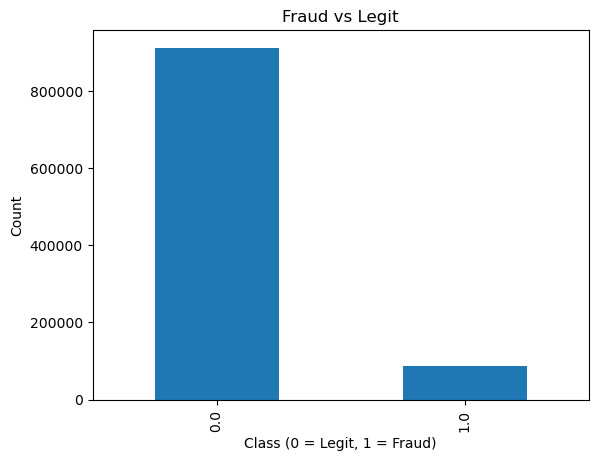

In [8]:
class_counts = fraud["fraud"].value_counts()
print("Class counts:\n", class_counts)

class_percent = fraud["fraud"].value_counts(normalize=True) * 100
print("\nClass percentage (%):\n", class_percent)

class_counts.plot(kind="bar")
plt.title("Fraud vs Legit")
plt.xlabel("Class (0 = Legit, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

Yes, this is an imbalanced dataset. Class 0 (legit) is much higher than class 1 (fraud) so, the majority class is “legit” and the minority class is “fraud”.

Step 2

In [9]:
# Features & target
X = fraud.drop(columns=["fraud"])
y = fraud["fraud"]

# Traintest
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=30,
    stratify=y   
)

# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)  
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

Step 3

In [14]:
y_pred_baseline = log_reg.predict(X_test_scaled)

print("Classification report:\n")
print(classification_report(y_test, y_pred_baseline, digits=2))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_baseline))

precision_1 = precision_score(y_test, y_pred_baseline, pos_label=1)
recall_1 = recall_score(y_test, y_pred_baseline, pos_label=1)
f1_1 = f1_score(y_test, y_pred_baseline, pos_label=1)

print("Precision:", precision_1)
print("Recall:   ", recall_1)
print("F1-score: ", f1_1)

Classification report:

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182519
         1.0       0.90      0.60      0.72     17481

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000

Confusion matrix:
[[181314   1205]
 [  6963  10518]]
Precision: 0.8972106116181865
Recall:    0.6016818259824953
F1-score:  0.7203122859882208


Step 4

Original counts:
fraud
0.0    730078
1.0     69922
Name: count, dtype: int64

Oversampled counts:
fraud
0.0    730078
1.0    730078
Name: count, dtype: int64


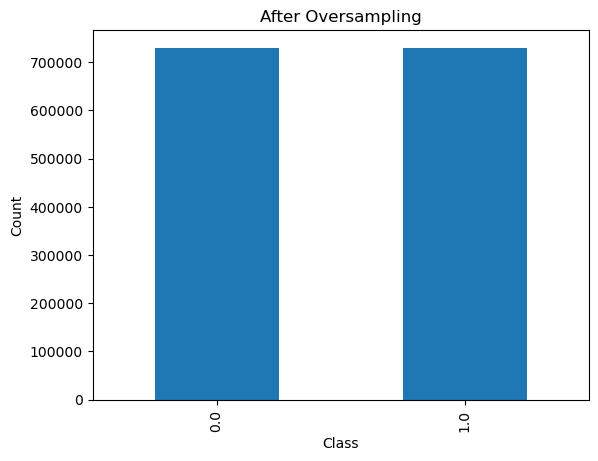

c:\Users\river\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



Classification report oversampling:

              precision    recall  f1-score   support

         0.0     0.9947    0.9324    0.9625    182519
         1.0     0.5733    0.9481    0.7145     17481

    accuracy                         0.9338    200000
   macro avg     0.7840    0.9402    0.8385    200000
weighted avg     0.9579    0.9338    0.9409    200000

Confusion matrix oversampling:
[[170184  12335]
 [   908  16573]]

Minority class metrics with oversampling:
Precision: 0.5733015082330151
Recall:    0.9480578914249757
F1-score:  0.7145228394662527


In [19]:
train_over_df = pd.DataFrame(X_train_scaled, columns=X.columns)
train_over_df["fraud"] = y_train.values

# Separate majority and minority classes
majority = train_over_df[train_over_df["fraud"] == 0]
minority = train_over_df[train_over_df["fraud"] == 1]

print("Original counts:")
print(train_over_df["fraud"].value_counts())

# Oversample
minority_oversampled = resample(
    minority,
    replace=True,
    n_samples=len(majority),
    random_state=30
)

train_over = pd.concat([majority, minority_oversampled])

print("\nOversampled counts:")
print(train_over["fraud"].value_counts())

train_over["fraud"].value_counts().plot(kind="bar")
plt.title("After Oversampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Separate features
X_train_over = train_over.drop(columns=["fraud"])
y_train_over = train_over["fraud"]

# Train 
log_reg_over = LogisticRegression(max_iter=1000)
log_reg_over.fit(X_train_over, y_train_over)

y_pred_over = log_reg_over.predict(X_test_scaled)

print("\nClassification report oversampling:\n")
print(classification_report(y_test, y_pred_over, digits=4))

print("Confusion matrix oversampling:")
print(confusion_matrix(y_test, y_pred_over))

precision_1_over = precision_score(y_test, y_pred_over, pos_label=1)
recall_1_over = recall_score(y_test, y_pred_over, pos_label=1)
f1_1_over = f1_score(y_test, y_pred_over, pos_label=1)

print("\nMinority class metrics with oversampling:")
print("Precision:", precision_1_over)
print("Recall:   ", recall_1_over)
print("F1-score: ", f1_1_over)

Overview: Oversampling significantly improves recall for fraud (from 0.60 to 0.95), meaning the model catches far more fraudulent transactions.
Precision drops because oversampling increases false positives expected behavior. Overall, oversampling improves fraud detection substantially.

Step 5

Original counts:
fraud
0.0    730078
1.0     69922
Name: count, dtype: int64

Undersampled counts:
fraud
0.0    69922
1.0    69922
Name: count, dtype: int64


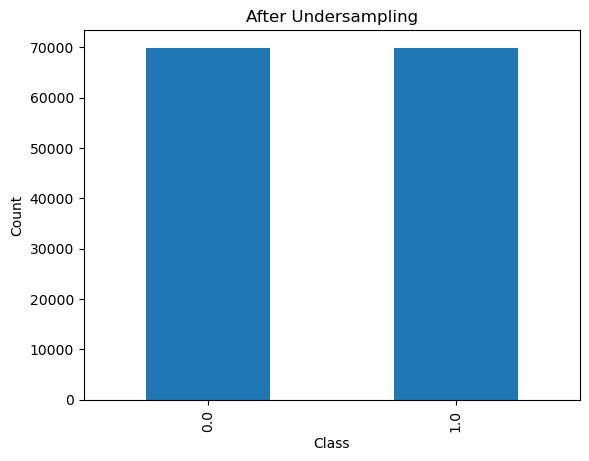

c:\Users\river\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



Classification undersampling:

              precision    recall  f1-score   support

         0.0     0.9946    0.9322    0.9624    182519
         1.0     0.5722    0.9472    0.7134     17481

    accuracy                         0.9335    200000
   macro avg     0.7834    0.9397    0.8379    200000
weighted avg     0.9577    0.9335    0.9406    200000

Confusion matrix undersampling:
[[170141  12378]
 [   923  16558]]

Minority class with undersampling:
Precision 0.572228366049212
Recall 0.9471998169441107
F1-score 0.7134455048796777


In [20]:
train_under_df = pd.DataFrame(X_train_scaled, columns=X.columns)
train_under_df["fraud"] = y_train.values

majority = train_under_df[train_under_df["fraud"] == 0]
minority = train_under_df[train_under_df["fraud"] == 1]

print("Original counts:")
print(train_under_df["fraud"].value_counts())

# Undersample
majority_undersampled = resample(
    majority,
    replace=False,
    n_samples=len(minority),
    random_state=30
)

train_under = pd.concat([majority_undersampled, minority])

print("\nUndersampled counts:")
print(train_under["fraud"].value_counts())

train_under["fraud"].value_counts().plot(kind="bar")
plt.title("After Undersampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

X_train_under = train_under.drop(columns=["fraud"])
y_train_under = train_under["fraud"]

log_reg_under = LogisticRegression(max_iter=1000)
log_reg_under.fit(X_train_under, y_train_under)

y_pred_under = log_reg_under.predict(X_test_scaled)

print("\nClassification undersampling:\n")
print(classification_report(y_test, y_pred_under, digits=4))

print("Confusion matrix undersampling:")
print(confusion_matrix(y_test, y_pred_under))

precision_1_under = precision_score(y_test, y_pred_under, pos_label=1)
recall_1_under = recall_1_under = recall_score(y_test, y_pred_under, pos_label=1)
f1_1_under = f1_score(y_test, y_pred_under, pos_label=1)

print("\nMinority class with undersampling:")
print("Precision", precision_1_under)
print("Recall", recall_1_under)
print("F1-score", f1_1_under)

Overview: Undersampling gives results almost identical to oversampling, but it removes >650,000 legitimate samples.

The model trains on less data, which may reduce robustness. Still, fraud recall is greatly improved (0.95), but at the cost of discarding most of the dataset.

Step 6

In [21]:
sm = SMOTE(random_state=30, sampling_strategy=1.0)

X_train_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train)

print("Class distribution SMOTE:")
print(pd.Series(y_train_sm).value_counts())

log_reg_sm = LogisticRegression(max_iter=1000)
log_reg_sm.fit(X_train_sm, y_train_sm)

# Evaluate on original test set
y_pred_sm = log_reg_sm.predict(X_test_scaled)

print("\nClassification report SMOTE:\n")
print(classification_report(y_test, y_pred_sm, digits=4))

print("Confusion matrix SMOTE:")
print(confusion_matrix(y_test, y_pred_sm))

precision_1_sm = precision_score(y_test, y_pred_sm, pos_label=1)
recall_1_sm = recall_score(y_test, y_pred_sm, pos_label=1)
f1_1_sm = f1_score(y_test, y_pred_sm, pos_label=1)

print("\nMinority class with SMOTE:")
print("Precision", precision_1_sm)
print("Recall", recall_1_sm)
print("F1-score", f1_1_sm)

Class distribution SMOTE:
fraud
0.0    730078
1.0    730078
Name: count, dtype: int64

Classification report SMOTE:

              precision    recall  f1-score   support

         0.0     0.9947    0.9325    0.9626    182519
         1.0     0.5735    0.9480    0.7147     17481

    accuracy                         0.9338    200000
   macro avg     0.7841    0.9402    0.8386    200000
weighted avg     0.9579    0.9338    0.9409    200000

Confusion matrix SMOTE:
[[170196  12323]
 [   909  16572]]

Minority class with SMOTE:
Precision 0.5735248312856895
Recall 0.9480006864595847
F1-score 0.7146800069001208


Overview: Best overall technique because keeps the full training dataset, prevents overfitting (better than random oversampling) and achieves the highest F1-score for the minority class